In [5]:
from pyswmm import Simulation, Subcatchments, SystemStats, Nodes

import seaborn as sns
import itertools 
import numpy as np;
import pandas as pd;
import os,sys
import matplotlib.pyplot as plt;
import pickle

from pyswmm import Simulation;
from pyswmm import Subcatchments;
from pyswmm import Nodes;
from pyswmm import SystemStats;
from pyswmm import Simulation;
from swmmtoolbox import swmmtoolbox;
from itertools import combinations
from os.path import dirname

parent_dir = (dirname(os.getcwd()))
sys.path.append("\\".join([parent_dir, 'model']) )

import swmm_functions
from swmm_functions import *

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# input parameters

In [141]:
# enter inputs here
run = 'P_4in_SAT'
write = 'P_4in_WRITE.inp'
read = 'P_4in_READ.inp'
P = 4

In [142]:
import os
current_dir = (os.getcwd())
write_path = '\\'.join([current_dir, 'inp_files\\SCSTYPEI_MGA\\'+str(write)])
read_path = '\\'.join([current_dir, 'inp_files\\SCSTYPEI_MGA\\'+str(read)])
out_path= '\\'.join([current_dir, 'out\\'])

In [143]:
def test_sim(write):
    with Simulation(write,'r') as sim:
        for step in sim:
            pass
        system_routing = SystemStats(sim)
        sim.report()
        print(system_routing.runoff_stats)
        
test_sim(write_path)

{'drains': 0.0, 'evaporation': 0.0, 'final_snow_cover': 0.0, 'final_storage': 0.0, 'infiltration': 31183.22569541102, 'init_snow_cover': 0.0, 'init_storage': 0.0, 'routing_error': -14.83826663696286, 'rainfall': 3.9999999999999503, 'runoff': 38931.1739755477, 'runon': 0.0, 'snow_removed': 0.0}


In [144]:
#open params and soil pickles
with open('params_2.pickle', 'rb') as handle:
    params = pickle.load(handle)
    params_df = pd.DataFrame(params)
params_df['L:W']=params['L']/params['W']
params_df['W2']=(params['A']*43560)/params['L']
params_df.sort_values(by='W',ascending=False)

,A,L,fV,S,W,A2,A1,L:W,W2
0,1.411416,2.515289,0.485445,1,24443.029038,0.685165,0.726251,0.000103,24443.029038
0,1.411416,2.515289,0.485445,2,24443.029038,0.685165,0.726251,0.000103,24443.029038
0,1.411416,2.515289,0.485445,4,24443.029038,0.685165,0.726251,0.000103,24443.029038
0,1.411416,2.515289,0.485445,3,24443.029038,0.685165,0.726251,0.000103,24443.029038
96,2.256843,31.165890,0.243929,1,3154.348180,0.550510,1.706333,0.009880,3154.348180
96,2.256843,31.165890,0.243929,2,3154.348180,0.550510,1.706333,0.009880,3154.348180
96,2.256843,31.165890,0.243929,3,3154.348180,0.550510,1.706333,0.009880,3154.348180
96,2.256843,31.165890,0.243929,4,3154.348180,0.550510,1.706333,0.009880,3154.348180
51,1.683029,34.535796,0.905890,1,2122.804107,1.524639,0.158389,0.016269,2122.804107
51,1.683029,34.535796,0.905890,4,2122.804107,1.524639,0.158389,0.016269,2122.804107


In [145]:
#open params and soil pickles
with open('soil_SAT.pickle', 'rb') as handle:
    soil = pickle.load(handle)
soil

,Soil Texture Class,K,H_i,ϕ,FC,WP,IMD,Cond
0,Sand,4.740,1.93,0.437,0.062,0.024,0,SAT
1,Loamy Sand,1.180,2.40,0.437,0.105,0.047,0,SAT
2,Sandy Loam,0.430,4.33,0.453,0.190,0.085,0,SAT
3,Loam,0.130,3.50,0.463,0.232,0.116,0,SAT
4,Silt Loam,0.260,6.69,0.501,0.284,0.135,0,SAT
5,Sandy Clay Loam,0.060,8.66,0.398,0.244,0.136,0,SAT
6,Silty Clay Loam,0.040,10.63,0.471,0.342,0.210,0,SAT
7,Sandy Clay,0.023,9.45,0.430,0.321,0.221,0,SAT
8,Silty Clay,0.020,11.42,0.479,0.371,0.251,0,SAT
9,Clay,0.010,12.60,0.475,0.378,0.265,0,SAT


# Run model

In [146]:
with open(read_path) as f:
    for i, line in enumerate(f, 1):
        if i ==69:
            break
print(line)

S2              	12.6      	0.01      	0.097     



In [147]:
perm_line = 69

K=soil["K"][1] #    pulls the K value from soil dictionary
H_i=soil["H_i"][1] #    suction head
IMD=soil["IMD"][1] #    initial moisture deficit
Cond=soil["Cond"][1]

update_GA(read_path,write_path, perm_line,H_i,K,IMD)
with open(write_path) as f:
    for i, line in enumerate(f, 1):
        if i ==69:
            break
print(line)

S2              	2.4      	1.18      	0



In [148]:
#run sim for impervious to pervious

perm_line = 69
data1=dict()
j=10
g=dict()

for index, row in params_df.iterrows():
    for i in range(j):
        run_sim(g, soil, read_path, write_path,perm_line,i,row['A1'], row['A2'],row['W'],row['W'],row['S'],P)
        df_temp1=convert_to_df(i,g)
        data1.update(df_temp1)

In [149]:
#run simulation for pervious surface only 

perm_line = 69
j=10
data2=dict()
f=dict()

for index, row in params_df.iterrows():
    for i in range(j):
        run_sim(f, soil, read_path, write_path,perm_line,i,0,row['A2'],row['W'],row['W'],row['S'],P)
        df_temp2=convert_to_df(i,f)
        data2.update(df_temp2)

# Calculate IF

In [150]:
#rename columns - data1
core1 = pd.DataFrame(data1)
core1=core1.reset_index()
core1.rename({'level_0': 'Ks',
              'level_1': 'W', 
              'level_2': 'A1',
              'level_3': 'A2',
              'level_4': 'S',
              'level_5': 'P',
              'level_6': 'H_i',
              'level_7': 'IMD'}, axis=1, inplace=True)
core1['scenario']=run
core1['A']=core1['A2']+core1['A1']
core1['fV']=core1['A2']/core1['A']
# core1['IF1']=core1['infiltration']/(core1['runon']+core1['precipitation']*core1['A2']*43560/12)
len(core1)
core1

,index,Ks,W,A1,A2,S,P,H_i,IMD,evaporation,infiltration,peak_runoff_rate,precipitation,runoff,runon,scenario,A,fV
0,0,0.01,3.036074,0.003934,0.027515,1.0,4,12.60,0,0.0,33.746862,0.050102,4.0,422.615696,56.653037,P_4in_SAT,0.031449,0.874911
1,1,0.01,3.036074,0.003934,0.027515,2.0,4,12.60,0,0.0,32.848874,0.056309,4.0,423.545123,56.635929,P_4in_SAT,0.031449,0.874911
2,2,0.01,3.036074,0.003934,0.027515,3.0,4,12.60,0,0.0,32.404570,0.059740,4.0,424.012199,56.626722,P_4in_SAT,0.031449,0.874911
3,3,0.01,3.036074,0.003934,0.027515,4.0,4,12.60,0,0.0,32.120876,0.062038,4.0,424.314393,56.620832,P_4in_SAT,0.031449,0.874911
4,4,0.01,6.452131,0.018511,0.003799,1.0,4,12.60,0,0.0,4.317210,0.054806,4.0,317.828135,266.717398,P_4in_SAT,0.022310,0.170273
5,5,0.01,6.452131,0.018511,0.003799,2.0,4,12.60,0,0.0,4.258682,0.054974,4.0,317.803864,266.676879,P_4in_SAT,0.022310,0.170273
6,6,0.01,6.452131,0.018511,0.003799,3.0,4,12.60,0,0.0,4.229773,0.055009,4.0,317.765392,266.640010,P_4in_SAT,0.022310,0.170273
7,7,0.01,6.452131,0.018511,0.003799,4.0,4,12.60,0,0.0,4.211157,0.055021,4.0,317.726552,266.606117,P_4in_SAT,0.022310,0.170273
8,8,0.01,12.683327,0.041201,0.068844,1.0,4,12.60,0,0.0,82.227149,0.209529,4.0,1511.976614,593.668503,P_4in_SAT,0.110046,0.625597
9,9,0.01,12.683327,0.041201,0.068844,2.0,4,12.60,0,0.0,80.407559,0.228338,4.0,1513.916316,593.602192,P_4in_SAT,0.110046,0.625597


In [151]:
##### rename columns - data2
core2 = pd.DataFrame(data2)
core2=core2.reset_index()
core2.rename({'level_0': 'Ks',
              'level_1': 'W', 
              'level_2': 'A1',
              'level_3': 'A2',
              'level_4': 'S',
              'level_5': 'P',
              'level_6': 'H_i',
              'level_7': 'IMD'}, axis=1, inplace=True)
core2['A']=core2['A2']+core2['A1']
core2['fV']=core2['A2']/core2['A']
len(core2)

core2

,index,Ks,W,A1,A2,S,P,H_i,IMD,evaporation,infiltration,peak_runoff_rate,precipitation,runoff,runon,A,fV
0,0,0.01,3.036074,0,0.027515,1.0,4,12.60,0,0.0,33.587875,0.043385,4.0,366.100140,0.0,0.027515,1.0
1,1,0.01,3.036074,0,0.027515,2.0,4,12.60,0,0.0,32.717503,0.048887,4.0,367.015472,0.0,0.027515,1.0
2,2,0.01,3.036074,0,0.027515,3.0,4,12.60,0,0.0,32.287182,0.051945,4.0,367.476180,0.0,0.027515,1.0
3,3,0.01,3.036074,0,0.027515,4.0,4,12.60,0,0.0,32.012223,0.053999,4.0,367.774378,0.0,0.027515,1.0
4,4,0.01,6.452131,0,0.003799,1.0,4,12.60,0,0.0,4.122741,0.009303,4.0,51.127202,0.0,0.003799,1.0
5,5,0.01,6.452131,0,0.003799,2.0,4,12.60,0,0.0,4.099555,0.009328,4.0,51.154510,0.0,0.003799,1.0
6,6,0.01,6.452131,0,0.003799,3.0,4,12.60,0,0.0,4.088074,0.009334,4.0,51.165877,0.0,0.003799,1.0
7,7,0.01,6.452131,0,0.003799,4.0,4,12.60,0,0.0,4.080626,0.009336,4.0,51.171824,0.0,0.003799,1.0
8,8,0.01,12.683327,0,0.068844,1.0,4,12.60,0,0.0,80.970468,0.128617,4.0,919.256367,0.0,0.068844,1.0
9,9,0.01,12.683327,0,0.068844,2.0,4,12.60,0,0.0,79.373988,0.140669,4.0,920.996921,0.0,0.068844,1.0


In [152]:
#merge dataframes 
col_list = ['infiltration','runoff','index']
core2_perv = core2[col_list]
df_core = core1.merge(core2_perv, how = 'inner', on = ['index'])
df_core['delta_inf']=df_core['infiltration_x']-df_core['infiltration_y']
df_core['delta_run']=df_core['runoff_x']-df_core['runoff_y']
df_core['IF']=df_core['delta_inf']/(df_core['runon'])
len(df_core)

4000

In [153]:
col_list = ['index','IF','W','A','A2','A1','fV','Ks','S','P','H_i','IMD']
df_core= df_core[col_list]
df_core.to_csv('out/'+str(run)+'.csv')

In [154]:
#send to pickle
with open('out/'+str(run)+'.pickle', 'wb') as handle:
    pickle.dump(df_core, handle, protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1, 'IF across range of pervious fractions')

<Figure size 720x576 with 0 Axes>

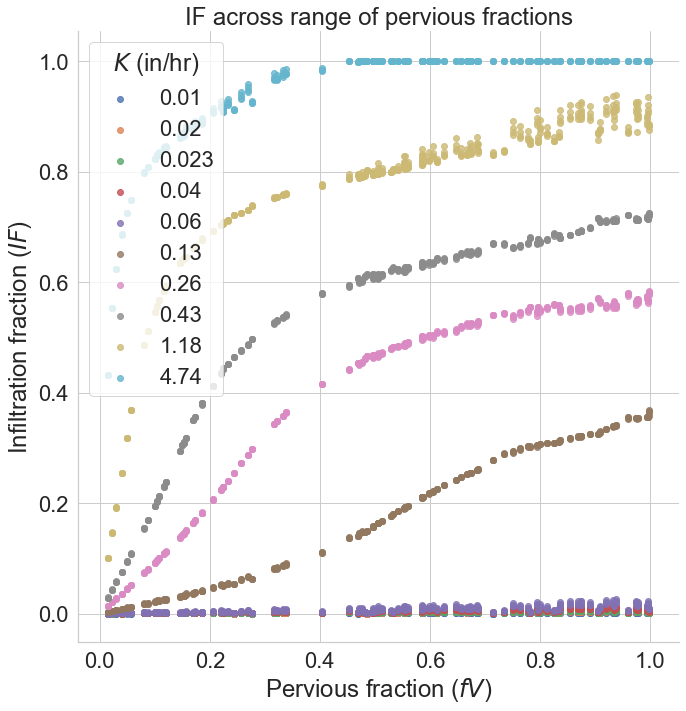

In [155]:
sns.set(color_codes=True)
sns.set(font_scale=2)  
plt.figure(1, figsize=(10,8), )
sns.set_context("talk",rc={"lines.linewidth": 2.5})
sns.set(style="whitegrid", font_scale=2,rc={'figure.figsize':(12,8)})
sns.lmplot( x="fV", y="IF", data=df_core, fit_reg=False, hue='Ks', logx =False, height = 10, legend= False)

plt.legend(title = '$K$ (in/hr)', loc = 'best')
plt.xlabel('Pervious fraction ($fV$)')

plt.ylabel('Infiltration fraction ($IF$)')
plt.title("IF across range of pervious fractions")